分两步，先了解单层的感知机算法怎么应用；然后再过渡到多层感知机。

# 一、先来建立一个简单的感知机来分类线性可分数据

### 构造一个线性可分的数据

In [1]:
import numpy as np

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])

In [3]:
print(X),print(Y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]


(None, None)

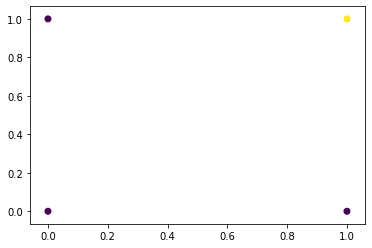

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### 使用sklearn中的感知机算法包来进行分类

sklearn中感知机接口的详细说明详见：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [40]:
from sklearn.linear_model import Perceptron
# clf = Perceptron(penalty = 'l2' ,random_state= 10)
clf = Perceptron(random_state= 100)
model = clf.fit(X,Y)


model.predict([[0,0],[0,1],[1,0],[1,1]])

array([0, 0, 0, 1])

#### 把这条决策边界画出来

In [37]:
print(model.intercept_)
print(model.coef_)

[-3.]
[[2. 2.]]


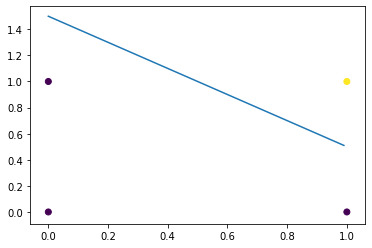

In [38]:
#用上述的系数生成一系列数据点，用于画直线
x = np.arange(0,1,0.01)
y = (x * model.coef_[0][0] + model.intercept_[0] ) * (-1) / model.coef_[0][1]   #因为决策平面是wx+y=0
plt.plot(x,y)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

#### 用此前使用过的“西瓜”数据集来进行尝试

In [46]:
import pandas as pd
data = pd.read_csv("/Users/lousiyuan/dataScience/gitSpace/DataScienceProject/Data/watermelon3_0.csv",header=None)  #这一句要替换为自己电脑上的文件路径
data.columns = ["index","color","root","noise","texture","navel","touch","density","sugar","class"]


#将数据拆成特征向量与目标变量
X = data[["color","root","noise","texture","navel","touch","density","sugar"]]
y = data[["class"]]

#拆分训练集与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.20)

# 进行必要的数据预处理
#对特征变量进行 ONE-HOT-ENCODING
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories="auto",handle_unknown = 'ignore')

#对类别型的变量进行 ONE-HOT-ENCODING
X_train_cate = X_train[["color","root","noise","texture","navel","touch"]]
ohe = ohe.fit(X_train_cate)
X_train_cate_ohe = pd.DataFrame(ohe.transform(X_train_cate).toarray())
X_train_cate_ohe.columns = ohe.get_feature_names()


# #对连续型变量无需进行标准化
X_train_continous = X_train[["density","sugar"]]
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train_continous)
X_train_continous_scaled = pd.DataFrame(scaler.transform(X_train_continous))

X_train_continous = pd.DataFrame(X_train[["density","sugar"]]).reset_index(drop=True)  #注意这里对索引进行重新排序，否则后面合并的时候会出现错位

#再跟原来的特征变量合并到一起
X_train_concat = pd.concat([X_train_cate_ohe,X_train_continous],axis=1)
print(X_train_concat[:3])

#对标签变量进行0-1编码，对于二分类，可以使用LabelBinarizer，但笔者更喜欢直接用map来显示转换
y_train_label = pd.DataFrame(y_train["class"].map({"是":1,"否":0}))
print(y_train_label[:3])

   x0_乌黑  x0_浅白  x0_青绿  x1_硬挺  x1_稍蜷  x1_蜷缩  x2_沉闷  x2_浊响  x2_清脆  x3_模糊  \
0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
1    1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0    0.0    0.0   
2    0.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    1.0   

   x3_清晰  x3_稍糊  x4_凹陷  x4_平坦  x4_稍凹  x5_硬滑  x5_软粘  density  sugar  
0    0.0    1.0    0.0    0.0    1.0    0.0    1.0    0.481  0.149  
1    0.0    1.0    0.0    0.0    1.0    1.0    0.0    0.666  0.091  
2    0.0    0.0    0.0    1.0    0.0    1.0    0.0    0.245  0.057  
    class
6       1
8       0
10      0


In [47]:
#在训练集上进行训练
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state= 100)
model = clf.fit(X_train_concat,y_train_label)

/Users/lousiyuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# 先对测试数据也进行一些数据预处理，注意要直接使用那些用于处理训练数据的转换操作实例，可以直接调用在训练数据fit好的算子
X_test_cate = X_test[["color","root","noise","texture","navel","touch"]]
#ohe是上面已经在训练数据上fit后的算子，这里可以直接调用
X_test_cate_ohe = pd.DataFrame(ohe.transform(X_test_cate).toarray())
X_test_cate_ohe.columns = ohe.get_feature_names()

X_test_continous = pd.DataFrame(scaler.transform(X_test[["density","sugar"]])).reset_index(drop=True)

#合并
X_test_concat = pd.concat([X_test_cate_ohe,X_test_continous],axis=1)

#对标签变量进行0-1编码，对于二分类，可以使用LabelBinarizer，但笔者更喜欢直接用map来显示转换
y_test_label = pd.DataFrame(y_test["class"].map({"是":1,"否":0}))

In [51]:
model.score(X_test_concat,y_test_label)

0.75

In [52]:
#另一种求准确率的方法
from sklearn.metrics import accuracy_score
ratio = accuracy_score(y_test_label,model.predict(X_test_concat))
print("二分类准确率: %f" % (ratio))

二分类准确率: 0.750000


# 二、用多层感知机来进行线性不可分数据的分类

构造线性不可分数据，即亦或问题

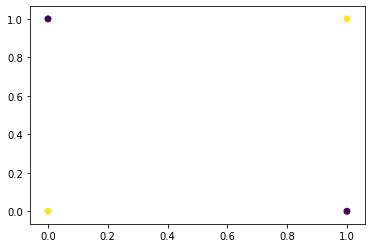

In [54]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([1,0,0,1])

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

#### 先用前面的简单感知机来试一把, 感受下简单的感知机如何处理这类数据

In [59]:
clf = Perceptron(random_state= 10)
model = clf.fit(X,Y)
model.score(X,Y)

0.5

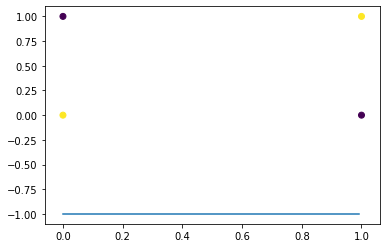

In [62]:
x = np.arange(0,1,0.01)
y = (x * model.coef_[0][0] + model.intercept_[0] ) * (-1) / model.coef_[0][1]   #因为决策平面是wx+y=0
plt.plot(x,y)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

#### 体验多层感知机

sklearn中相关文档详见：https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron

In [74]:
from sklearn.neural_network import MLPClassifier
multi_layer_clf = MLPClassifier(solver='sgd', alpha=0.0001,hidden_layer_sizes=(80, 2), random_state=1)
model = multi_layer_clf.fit(X,Y)
model.score(X,Y)

1.0

In [72]:
import warnings
warnings.filterwarnings("ignore")

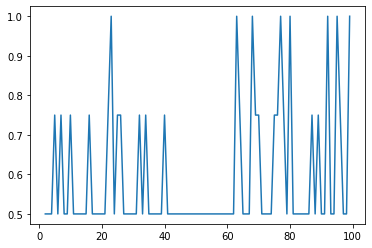

In [73]:
# 针对不同隐藏层中的神经元数量
model_score = []
x = [i for i in range(2,100,1)]
for i in x:
    clf = MLPClassifier(solver='sgd', alpha=0.00001,hidden_layer_sizes=(i,2), random_state=1, activation = 'relu' )
    model = clf.fit(X,Y)
    model_score.append(model.score(X,Y))


plt.plot(x,model_score)
plt.show()

#### 如果用这个多层感知机来分类“西瓜数据集”，会是什么效果？

In [108]:
multi_layer_clf = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(100, 10), random_state=40)
model = multi_layer_clf.fit(X_train_concat,y_train_label)
model.score(X_test_concat,y_test_label)

0.75

# 完